# Correlation Matrix

This code is utilized to compute the correlation among various features present in the input dataset.


In [1]:
%load_ext jupyter_black

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from utils import get_training_dataset

In [3]:
# Read csv file and import to df
df = pd.read_csv("data/updated_corr.csv")
df.head()

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,rainfall_max_6h,rainfall_max_24h,total_houses,rwi,mean_slope,...,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged,percent_houses_damaged_5years
0,DURIAN,2006,101,0.0,303.180555,0.122917,0.085417,31.000000,-0.213039,1.018526,...,2.699781,5.762712,3445.709753,1,0.0,0.00,1.00,0.000000,0.0,0.0
1,DURIAN,2006,4475,0.0,638.027502,0.091667,0.027083,3.301020,-0.527000,1.579400,...,4.585088,12.799127,8602.645832,1,0.0,0.00,1.00,0.000000,0.0,0.0
2,DURIAN,2006,4639,0.0,603.631997,0.535417,0.146354,12.103741,-0.283000,0.551764,...,1.527495,8.833333,5084.012925,1,0.0,0.01,0.99,197.339034,0.0,0.0
3,DURIAN,2006,4640,0.0,614.675270,0.356250,0.101562,645.899660,-0.358889,2.107949,...,11.677657,17.530431,55607.865950,1,0.0,0.31,0.69,4970.477311,0.0,0.0
4,DURIAN,2006,4641,0.0,625.720905,0.202083,0.057812,1071.731293,-0.462800,3.538881,...,17.074011,31.931338,35529.342507,1,0.0,0.77,0.23,12408.594656,0.0,0.0


#### You can check the correlation among features before and after removing windspeed == 0

# Remove wind_speed where values==0
df = df[(df[["wind_speed"]] != 0).any(axis=1)]
df = df.drop(columns=["grid_point_id", "typhoon_year"])
df.head()

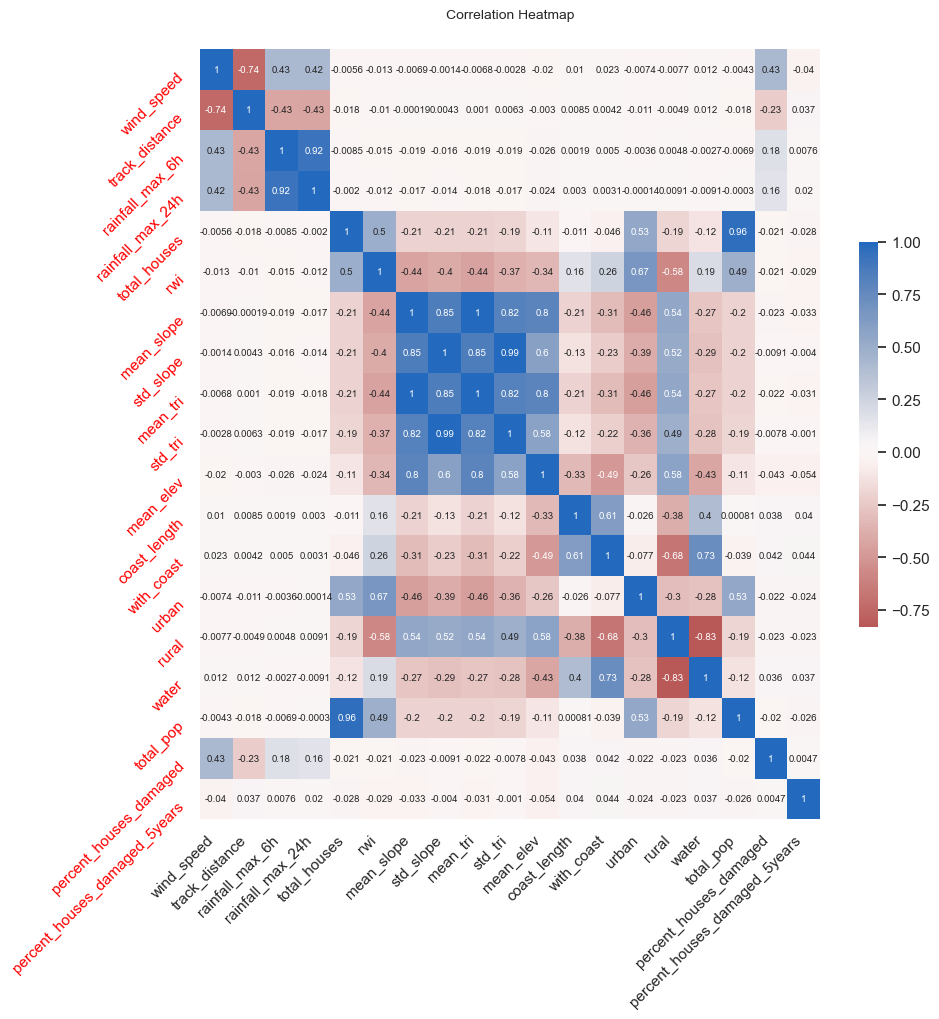

In [6]:
# Estimate correlation matrix

fig, ax = plt.subplots()

corrMatrix = df.corr()

plt.rcParams["figure.figsize"] = (10, 10)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 7},
    cmap="vlag_r",
    center=0,
)

# sn.diverging_palette(220, 20, as_cmap=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, va="top", color="red")

heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 10}, pad=22)

plt.show()

C:\Users\pauni\AppData\Local\Temp\ipykernel_58084\2935027842.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix_abs = df.corr().abs()


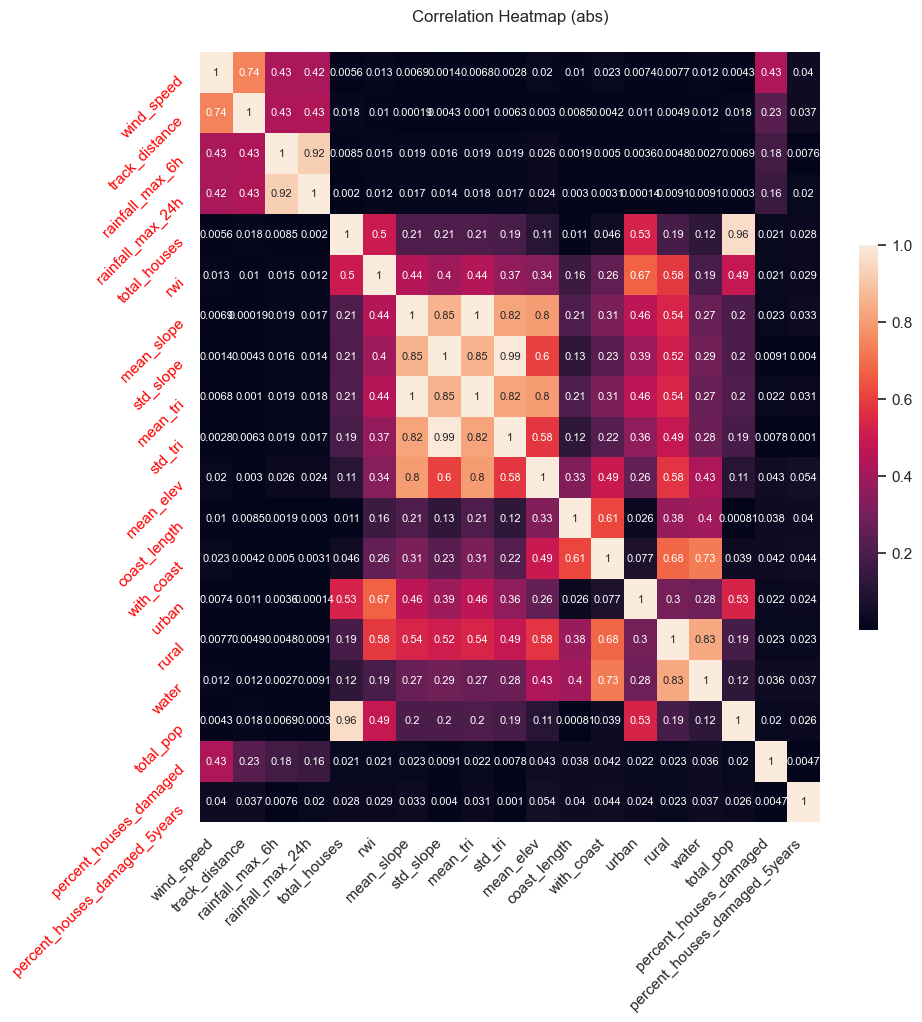

In [7]:
# The absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr().abs()
# print (corrMatrix)

plt.rcParams["figure.figsize"] = (9, 6)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix_abs,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 8},
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, va="top", color="red")

heatmap.set_title("Correlation Heatmap (abs)", fontdict={"fontsize": 12}, pad=22)

plt.show()

In [8]:
# Print out correlated pairs of features
pair = (
    corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=True)
)
pairs = pair[pair.gt(0.8)]

if len(pairs) > 0:
    print(pairs)
else:
    print("No correlated features found!")

mean_slope       std_tri             0.819225
mean_tri         std_tri             0.819606
rural            water               0.829211
std_slope        mean_tri            0.852646
mean_slope       std_slope           0.854719
rainfall_max_6h  rainfall_max_24h    0.922418
total_houses     total_pop           0.961985
std_slope        std_tri             0.989076
mean_slope       mean_tri            0.998442
dtype: float64


/var/folders/sx/c10hm4fj3glf7mw1_mzwcl700000gn/T/ipykernel_27270/2844072590.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool))


#### Simple Scatterplot to show relation between ‘total_buildings’ and ‘relative_wealth_index’, coloured by damage

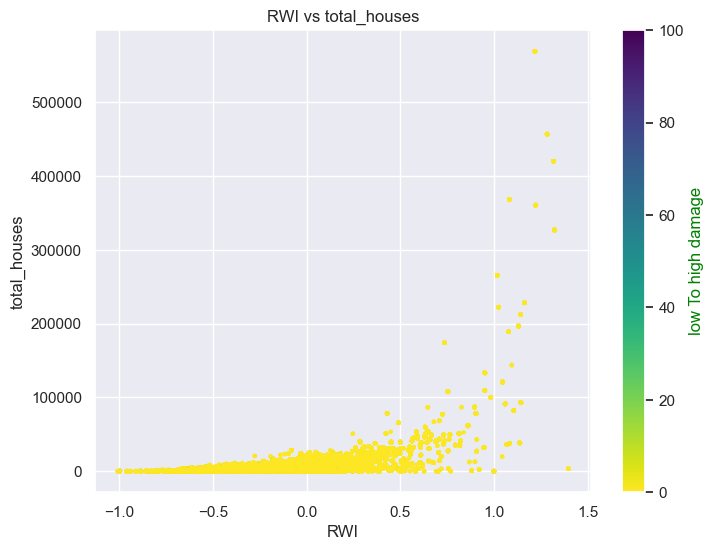

In [9]:
# For All damaged values
x = df["rwi"]
y = df["total_houses"]
plt.rcParams.update({"figure.figsize": (8, 6), "figure.dpi": 100})
plt.scatter(
    x,
    y,
    c=df["percent_houses_damaged"],
    cmap="viridis_r",
    s=5,
    vmin=0,
    vmax=100,
)

plt.colorbar().set_label("low To high damage", size=12, color="green")
plt.title("RWI vs total_houses")
plt.xlabel("RWI")
plt.ylabel("total_houses")
plt.show()

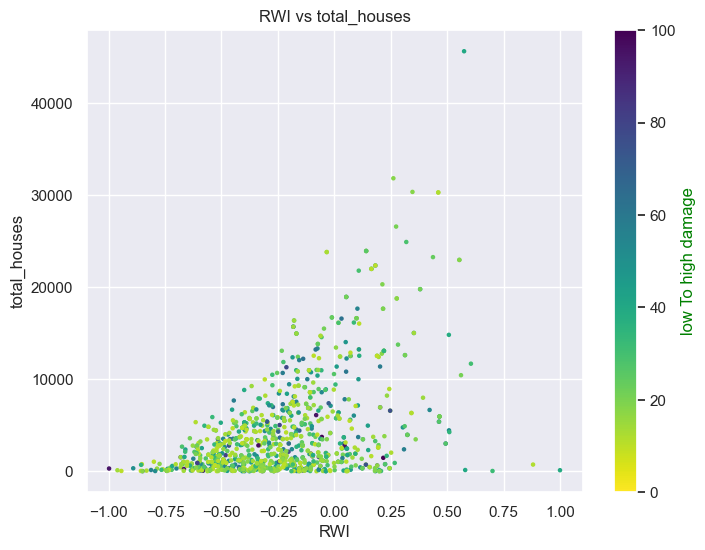

In [10]:
# For damaged values > 10
x = df[df.percent_houses_damaged > 10]["rwi"]
y = df[df.percent_houses_damaged > 10]["total_houses"]
plt.rcParams.update({"figure.figsize": (8, 6), "figure.dpi": 100})
plt.scatter(
    x,
    y,
    c=df[df.percent_houses_damaged > 10]["percent_houses_damaged"],
    cmap="viridis_r",
    s=5,
    vmin=0,
    vmax=100,
)
# plt.scatter(x, y, c='red', cmap=df['percent_buildings_damaged'], s=20)
plt.colorbar().set_label("low To high damage", size=12, color="green")
plt.title("RWI vs total_houses")
plt.xlabel("RWI")
plt.ylabel("total_houses")
plt.show()